In [27]:
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from scipy.stats import zscore
import warnings
from imblearn.over_sampling import RandomOverSampler
from collections import Counter
warnings.filterwarnings("ignore")

# Loading Data

In [2]:
import pandas as pd
df=pd.read_csv("Data file.csv")
df.head()

,Unnamed: 0,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
0,1,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,...,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,UPW,2016-07-20
1,2,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,...,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,UPW,2016-08-10
2,3,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,...,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,2016-08-19
3,4,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,...,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,UPW,2016-06-06
4,5,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,...,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,UPW,2016-06-22


In [3]:
df.dtypes

Unnamed: 0                int64
label                     int64
msisdn                   object
aon                     float64
daily_decr30            float64
daily_decr90            float64
rental30                float64
rental90                float64
last_rech_date_ma       float64
last_rech_date_da       float64
last_rech_amt_ma          int64
cnt_ma_rech30             int64
fr_ma_rech30            float64
sumamnt_ma_rech30       float64
medianamnt_ma_rech30    float64
medianmarechprebal30    float64
cnt_ma_rech90             int64
fr_ma_rech90              int64
sumamnt_ma_rech90         int64
medianamnt_ma_rech90    float64
medianmarechprebal90    float64
cnt_da_rech30           float64
fr_da_rech30            float64
cnt_da_rech90             int64
fr_da_rech90              int64
cnt_loans30               int64
amnt_loans30              int64
maxamnt_loans30         float64
medianamnt_loans30      float64
cnt_loans90             float64
amnt_loans90              int64
maxamnt_

Here we can see that there are columns with wrong data type so we will try to convert the required columns into its specific datatype.

# Data Cleaning 

In [4]:
df["msisdn"]=df["msisdn"].map(lambda x:x.replace("I",""))

In [5]:
x=df[["pcircle","pdate","msisdn"]]
df.drop(['pcircle','pdate','msisdn','Unnamed: 0'],axis=1,inplace=True)

In [6]:
df.head()

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,...,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90
0,0,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,1539,2,...,2,12,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000
1,1,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,5787,1,...,1,12,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000
2,1,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,1539,1,...,1,6,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000
3,1,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,947,0,...,2,12,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000
4,1,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,2309,7,...,7,42,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333


In [7]:
abs(df)
df.head()

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,...,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90
0,0,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,1539,2,...,2,12,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000
1,1,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,5787,1,...,1,12,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000
2,1,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,1539,1,...,1,6,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000
3,1,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,947,0,...,2,12,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000
4,1,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,2309,7,...,7,42,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333


We cleaned the data of the visible errors now we will continue to check further using visualization techniques.

# Data Visualization

In [8]:
#statistical summary
df.describe()

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,...,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90
count,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,...,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000
mean,0.875177,8112.343445,5381.402289,6082.515068,2692.581910,3483.406534,3755.847800,3712.202921,2064.452797,3.978057,...,2.758981,17.952021,274.658747,0.054029,18.520919,23.645398,6.703134,0.046077,3.398826,4.321485
std,0.330519,75696.082531,9220.623400,10918.812767,4308.586781,5770.461279,53905.892230,53374.833430,2370.786034,4.256090,...,2.554502,17.379741,4245.264648,0.218039,224.797423,26.469861,2.103864,0.200692,8.813729,10.308108
min,0.000000,-48.000000,-93.012667,-93.012667,-23737.140000,-24720.580000,-29.000000,-29.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,246.000000,42.440000,42.692000,280.420000,300.260000,1.000000,0.000000,770.000000,1.000000,...,1.000000,6.000000,6.000000,0.000000,1.000000,6.000000,6.000000,0.000000,0.000000,0.000000
50%,1.000000,527.000000,1469.175667,1500.000000,1083.570000,1334.000000,3.000000,0.000000,1539.000000,3.000000,...,2.000000,12.000000,6.000000,0.000000,2.000000,12.000000,6.000000,0.000000,0.000000,1.666667
75%,1.000000,982.000000,7244.000000,7802.790000,3356.940000,4201.790000,7.000000,0.000000,2309.000000,5.000000,...,4.000000,24.000000,6.000000,0.000000,5.000000,30.000000,6.000000,0.000000,3.750000,4.500000
max,1.000000,999860.755168,265926.000000,320630.000000,198926.110000,200148.110000,998650.377733,999171.809410,55000.000000,203.000000,...,50.000000,306.000000,99864.560864,3.000000,4997.517944,438.000000,12.000000,3.000000,171.500000,171.500000


In [9]:
df.isnull().sum()

label                   0
aon                     0
daily_decr30            0
daily_decr90            0
rental30                0
rental90                0
last_rech_date_ma       0
last_rech_date_da       0
last_rech_amt_ma        0
cnt_ma_rech30           0
fr_ma_rech30            0
sumamnt_ma_rech30       0
medianamnt_ma_rech30    0
medianmarechprebal30    0
cnt_ma_rech90           0
fr_ma_rech90            0
sumamnt_ma_rech90       0
medianamnt_ma_rech90    0
medianmarechprebal90    0
cnt_da_rech30           0
fr_da_rech30            0
cnt_da_rech90           0
fr_da_rech90            0
cnt_loans30             0
amnt_loans30            0
maxamnt_loans30         0
medianamnt_loans30      0
cnt_loans90             0
amnt_loans90            0
maxamnt_loans90         0
medianamnt_loans90      0
payback30               0
payback90               0
dtype: int64

We can see that there are no null values in the columns of the data frame.

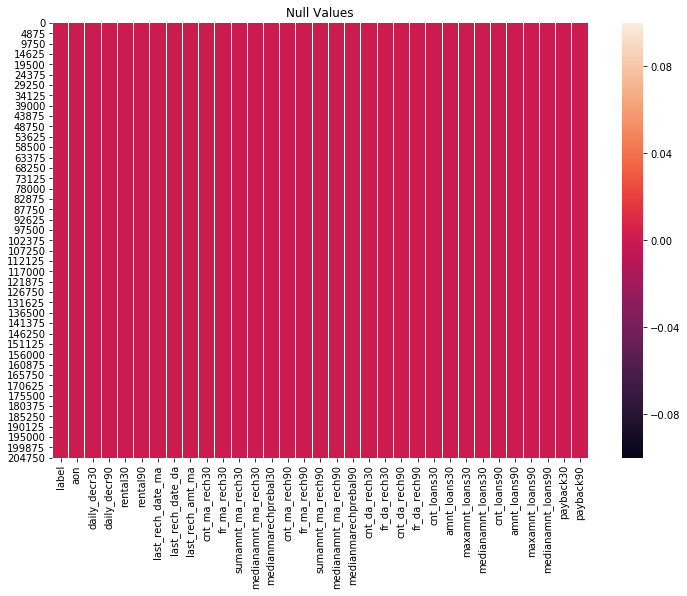

In [10]:
plt.figure(figsize=(12,8))
sns.heatmap(df.isnull())
plt.title("Null Values")
plt.show()

By looking at this heatmap we can say that there is no null value present in the dataset.

In [11]:
df['label'].unique()

array([0, 1], dtype=int64)

In [12]:
df['label'].value_counts()

1    183431
0     26162
Name: label, dtype: int64

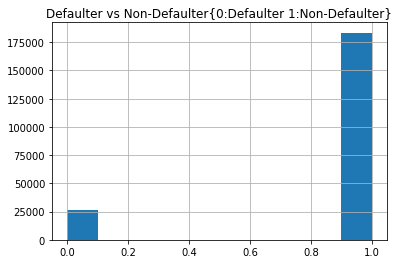

In [13]:
df['label'].hist(grid=True)
plt.title("Defaulter vs Non-Defaulter{0:Defaulter 1:Non-Defaulter}")
plt.show()

By looking at the histogram we can clearly say that there is class imbalance. So while selecting the best classifier for our model we will also look for the F-1 Score.

Text(0.5, 1.0, '0:Defaulter 1:Non-Defaulter')

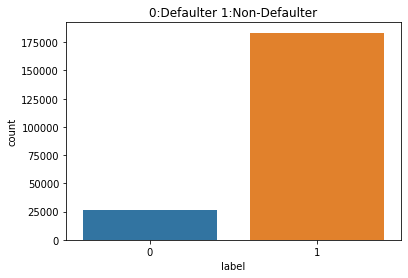

In [14]:
sns.countplot(df['label'])
plt.title("0:Defaulter 1:Non-Defaulter")

In [15]:
#sns.pairplot(df,hue='label') #As there are 33 columns so making a pairplot will take lots of time so we will not go for pairplots.

# Checking Correlation

In [16]:
cor=df.corr()

In [17]:
cor

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,...,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90
label,1.000000,-0.003785,0.168298,0.166150,0.058085,0.075521,0.003728,0.001711,0.131804,0.237331,...,0.196283,0.197272,0.000248,0.044589,0.004733,0.199788,0.084144,0.035747,0.048336,0.049183
aon,-0.003785,1.000000,0.001104,0.000374,-0.000960,-0.000790,0.001692,-0.001693,0.004256,-0.003148,...,-0.001826,-0.001726,-0.002764,0.004664,-0.000611,-0.002319,-0.001191,0.002771,0.001940,0.002203
daily_decr30,0.168298,0.001104,1.000000,0.977704,0.442066,0.458977,0.000487,-0.001636,0.275837,0.451385,...,0.366116,0.471492,-0.000028,-0.011610,0.008962,0.563496,0.400199,-0.037305,0.026915,0.047175
daily_decr90,0.166150,0.000374,0.977704,1.000000,0.434685,0.471730,0.000908,-0.001886,0.264131,0.426707,...,0.340387,0.447869,0.000025,-0.005591,0.009446,0.567204,0.397251,-0.034686,0.019400,0.040800
rental30,0.058085,-0.000960,0.442066,0.434685,1.000000,0.955237,-0.001095,0.003261,0.127271,0.233343,...,0.180203,0.233453,-0.000864,-0.016482,0.004012,0.298943,0.234211,-0.035489,0.072974,0.095147
rental90,0.075521,-0.000790,0.458977,0.471730,0.955237,1.000000,-0.001688,0.002794,0.121416,0.230260,...,0.171595,0.231906,-0.001411,-0.009467,0.005141,0.327436,0.251029,-0.034122,0.067110,0.099501
last_rech_date_ma,0.003728,0.001692,0.000487,0.000908,-0.001095,-0.001688,1.000000,0.001790,-0.000147,0.004311,...,0.001193,0.000903,0.000928,0.001835,-0.000225,0.000870,-0.001123,0.002771,-0.002233,-0.001583
last_rech_date_da,0.001711,-0.001693,-0.001636,-0.001886,0.003261,0.002794,0.001790,1.000000,-0.000149,0.001549,...,0.000380,0.000536,0.000503,0.000061,-0.000972,0.000519,0.001524,-0.002239,0.000077,0.000417
last_rech_amt_ma,0.131804,0.004256,0.275837,0.264131,0.127271,0.121416,-0.000147,-0.000149,1.000000,-0.002662,...,-0.027612,0.008502,0.001000,0.028370,0.000093,0.014067,0.148460,0.021004,-0.027369,-0.014260
cnt_ma_rech30,0.237331,-0.003148,0.451385,0.426707,0.233343,0.230260,0.004311,0.001549,-0.002662,1.000000,...,0.765802,0.752296,0.000109,-0.067011,0.014703,0.685257,0.174104,-0.071451,0.043617,0.017362


In [18]:
cor['label'].sort_values(ascending=False)

label                   1.000000
cnt_ma_rech30           0.237331
cnt_ma_rech90           0.236392
sumamnt_ma_rech90       0.205793
sumamnt_ma_rech30       0.202828
amnt_loans90            0.199788
amnt_loans30            0.197272
cnt_loans30             0.196283
daily_decr30            0.168298
daily_decr90            0.166150
medianamnt_ma_rech30    0.141490
last_rech_amt_ma        0.131804
medianamnt_ma_rech90    0.120855
fr_ma_rech90            0.084385
maxamnt_loans90         0.084144
rental90                0.075521
rental30                0.058085
payback90               0.049183
payback30               0.048336
medianamnt_loans30      0.044589
medianmarechprebal90    0.039300
medianamnt_loans90      0.035747
cnt_loans90             0.004733
cnt_da_rech30           0.003827
last_rech_date_ma       0.003728
cnt_da_rech90           0.002999
last_rech_date_da       0.001711
fr_ma_rech30            0.001330
maxamnt_loans30         0.000248
fr_da_rech30           -0.000027
aon       

We can see that their are 11 columns with less than 0.01 correlation from the target variable therefore very weak correlation. 

# Checking for Outliers

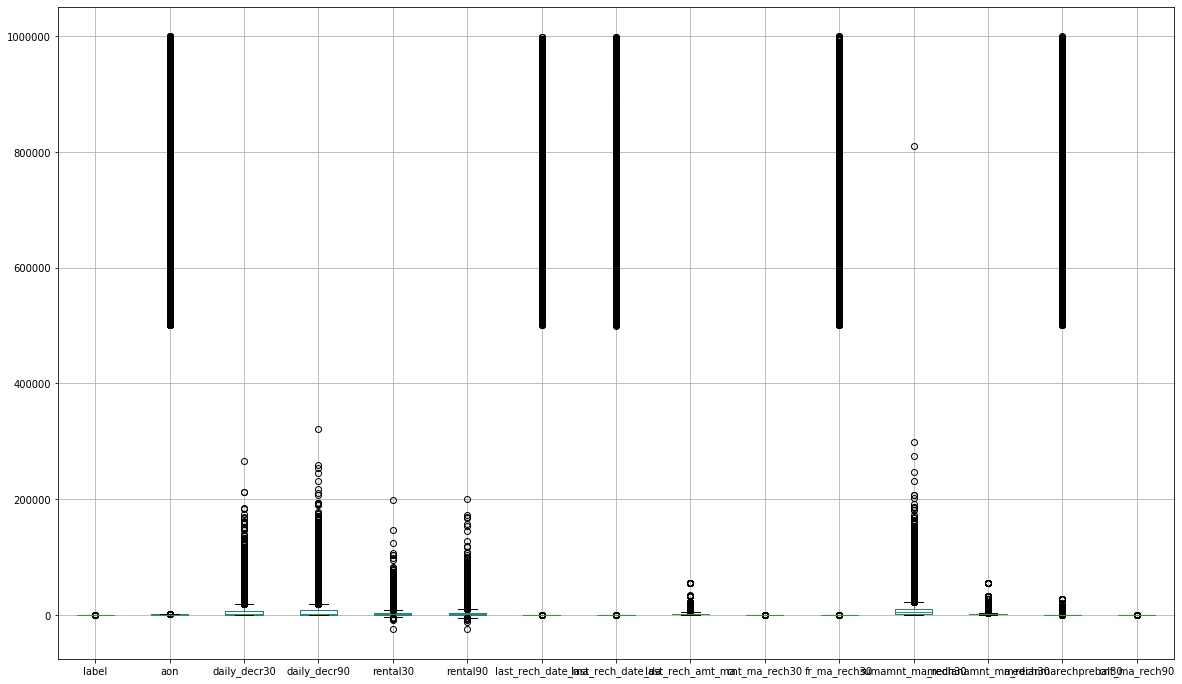

In [19]:
df.iloc[:,0:15].boxplot(figsize=[20,12])
plt.show()

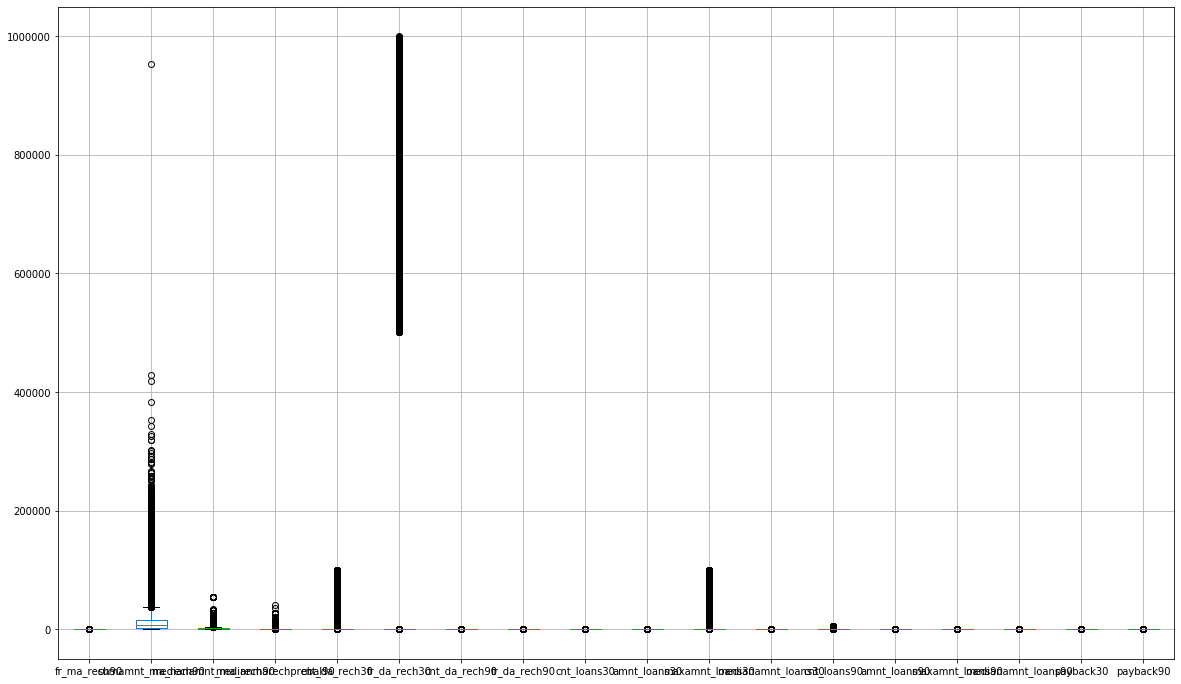

In [20]:
df.iloc[:,15:].boxplot(figsize=[20,12])
plt.show()

We can see that their are outliers in almost every column so we will try to remove it.

In [21]:
df.describe()

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,...,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90
count,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,...,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000
mean,0.875177,8112.343445,5381.402289,6082.515068,2692.581910,3483.406534,3755.847800,3712.202921,2064.452797,3.978057,...,2.758981,17.952021,274.658747,0.054029,18.520919,23.645398,6.703134,0.046077,3.398826,4.321485
std,0.330519,75696.082531,9220.623400,10918.812767,4308.586781,5770.461279,53905.892230,53374.833430,2370.786034,4.256090,...,2.554502,17.379741,4245.264648,0.218039,224.797423,26.469861,2.103864,0.200692,8.813729,10.308108
min,0.000000,-48.000000,-93.012667,-93.012667,-23737.140000,-24720.580000,-29.000000,-29.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,246.000000,42.440000,42.692000,280.420000,300.260000,1.000000,0.000000,770.000000,1.000000,...,1.000000,6.000000,6.000000,0.000000,1.000000,6.000000,6.000000,0.000000,0.000000,0.000000
50%,1.000000,527.000000,1469.175667,1500.000000,1083.570000,1334.000000,3.000000,0.000000,1539.000000,3.000000,...,2.000000,12.000000,6.000000,0.000000,2.000000,12.000000,6.000000,0.000000,0.000000,1.666667
75%,1.000000,982.000000,7244.000000,7802.790000,3356.940000,4201.790000,7.000000,0.000000,2309.000000,5.000000,...,4.000000,24.000000,6.000000,0.000000,5.000000,30.000000,6.000000,0.000000,3.750000,4.500000
max,1.000000,999860.755168,265926.000000,320630.000000,198926.110000,200148.110000,998650.377733,999171.809410,55000.000000,203.000000,...,50.000000,306.000000,99864.560864,3.000000,4997.517944,438.000000,12.000000,3.000000,171.500000,171.500000


In [22]:
import numpy as np
def cap_data(df):
    for col in df.columns:
        print("capping the ",col)
        if(((df[col].dtype)=='float64')|((df[col].dtype)=='int64')):
            percentiles=df[col].quantile([0.10,0.90]).values
            df[col]=np.where(df[col]<percentiles[0],percentiles[0],df[col])
            df[col]=np.where(df[col]>percentiles[1],percentiles[1],df[col])
        else:
            df[col]=df[col]
    return df
df_new=cap_data(df)        

capping the  label
capping the  aon
capping the  daily_decr30
capping the  daily_decr90
capping the  rental30
capping the  rental90
capping the  last_rech_date_ma
capping the  last_rech_date_da
capping the  last_rech_amt_ma
capping the  cnt_ma_rech30
capping the  fr_ma_rech30
capping the  sumamnt_ma_rech30
capping the  medianamnt_ma_rech30
capping the  medianmarechprebal30
capping the  cnt_ma_rech90
capping the  fr_ma_rech90
capping the  sumamnt_ma_rech90
capping the  medianamnt_ma_rech90
capping the  medianmarechprebal90
capping the  cnt_da_rech30
capping the  fr_da_rech30
capping the  cnt_da_rech90
capping the  fr_da_rech90
capping the  cnt_loans30
capping the  amnt_loans30
capping the  maxamnt_loans30
capping the  medianamnt_loans30
capping the  cnt_loans90
capping the  amnt_loans90
capping the  maxamnt_loans90
capping the  medianamnt_loans90
capping the  payback30
capping the  payback90


In [23]:
x=df_new.drop("label",axis=1)
y=df_new["label"]

In [24]:
x.skew()

aon                     0.529997
daily_decr30            1.087036
daily_decr90            1.148176
rental30                1.121860
rental90                1.151419
last_rech_date_ma       1.080014
last_rech_date_da       0.000000
last_rech_amt_ma        0.832098
cnt_ma_rech30           0.633088
fr_ma_rech30            1.007565
sumamnt_ma_rech30       0.760741
medianamnt_ma_rech30    0.926859
medianmarechprebal30    1.362535
cnt_ma_rech90           0.837199
fr_ma_rech90            1.585852
sumamnt_ma_rech90       0.860615
medianamnt_ma_rech90    1.054409
medianmarechprebal90    1.264253
cnt_da_rech30           0.000000
fr_da_rech30            0.000000
cnt_da_rech90           0.000000
fr_da_rech90            0.000000
cnt_loans30             0.904405
amnt_loans30            0.794991
maxamnt_loans30         2.206135
medianamnt_loans30      0.000000
cnt_loans90             1.030260
amnt_loans90            0.969053
maxamnt_loans90         2.241299
medianamnt_loans90      0.000000
payback30 

We can see that there is skewness present in the dataset so we will remove it using square root

In [25]:
for i in x.columns:
    if x[i].skew()>0.5:
        x[i]=np.sqrt(x[i])
    if x[i].skew()<-0.5:
        x[i]=np.sqrt(x[i])
x.skew()

aon                     0.168455
daily_decr30            0.508942
daily_decr90            0.559053
rental30                0.522174
rental90                0.540414
last_rech_date_ma       0.256994
last_rech_date_da       0.000000
last_rech_amt_ma       -0.390337
cnt_ma_rech30          -0.299238
fr_ma_rech30            0.298903
sumamnt_ma_rech30      -0.102581
medianamnt_ma_rech30   -0.419200
medianmarechprebal30    0.447213
cnt_ma_rech90           0.380755
fr_ma_rech90            0.735857
sumamnt_ma_rech90       0.192207
medianamnt_ma_rech90    0.314693
medianmarechprebal90    0.315503
cnt_da_rech30           0.000000
fr_da_rech30            0.000000
cnt_da_rech90           0.000000
fr_da_rech90            0.000000
cnt_loans30             0.602450
amnt_loans30            0.506255
maxamnt_loans30         2.206135
medianamnt_loans30      0.000000
cnt_loans90             0.659410
amnt_loans90            0.606304
maxamnt_loans90         2.241299
medianamnt_loans90      0.000000
payback30 

In [28]:
ros = RandomOverSampler(random_state=63)
x_ros, y_ros = ros.fit_resample(x, y)
print('Original dataset shape:',Counter(y))
print('Resamplr dataset shape:',Counter(y_ros))

Original dataset shape: Counter({1.0: 183431, 0.0: 26162})
Resamplr dataset shape: Counter({0.0: 183431, 1.0: 183431})


Here we have fixed the issue of class imbalance

# Finding Random State Value

In [29]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
maxAccu=0
maxRS=0
for i in range(1,100):
    x_train,x_test,y_train,y_test=train_test_split(x_ros,y_ros,test_size=0.3,random_state=i)
    mod=DecisionTreeClassifier()
    mod.fit(x_train,y_train)
    pred=mod.predict(x_test)
    acc=accuracy_score(y_test,pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best Accuracy is ",maxAccu," on Random_state ",maxRS)

Best Accuracy is  0.9454837859693437  on Random_state  96


We have found the accuracy to be 94% on Random State 96

# Creating train_test_split

In [30]:
x_train,x_test,y_train,y_test=train_test_split(x_ros,y_ros,test_size=0.3,random_state=96)

In [31]:
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression

In [32]:
lr=LogisticRegression()
lr.fit(x_train,y_train)
pred=lr.predict(x_test)
print(accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

0.769596307435103
[[43891 11271]
 [14087 40810]]
              precision    recall  f1-score   support

         0.0       0.76      0.80      0.78     55162
         1.0       0.78      0.74      0.76     54897

    accuracy                           0.77    110059
   macro avg       0.77      0.77      0.77    110059
weighted avg       0.77      0.77      0.77    110059



In [33]:
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)
pred=dt.predict(x_test)
print(accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

0.9451294305781445
[[54995   167]
 [ 5872 49025]]
              precision    recall  f1-score   support

         0.0       0.90      1.00      0.95     55162
         1.0       1.00      0.89      0.94     54897

    accuracy                           0.95    110059
   macro avg       0.95      0.95      0.94    110059
weighted avg       0.95      0.95      0.94    110059



In [34]:
rf=RandomForestClassifier()
rf.fit(x_train,y_train)
pred=rf.predict(x_test)
print(accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

0.9670176905114529
[[55021   141]
 [ 3489 51408]]
              precision    recall  f1-score   support

         0.0       0.94      1.00      0.97     55162
         1.0       1.00      0.94      0.97     54897

    accuracy                           0.97    110059
   macro avg       0.97      0.97      0.97    110059
weighted avg       0.97      0.97      0.97    110059



In [35]:
gnb=GaussianNB()
gnb.fit(x_train,y_train)
pred=gnb.predict(x_test)
print(accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

0.7451639575136972
[[44169 10993]
 [17054 37843]]
              precision    recall  f1-score   support

         0.0       0.72      0.80      0.76     55162
         1.0       0.77      0.69      0.73     54897

    accuracy                           0.75    110059
   macro avg       0.75      0.75      0.74    110059
weighted avg       0.75      0.75      0.74    110059



In [36]:
ada=AdaBoostClassifier()
ada.fit(x_train,y_train)
pred=ada.predict(x_test)
print(accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

0.7815989605575191
[[43805 11357]
 [12680 42217]]
              precision    recall  f1-score   support

         0.0       0.78      0.79      0.78     55162
         1.0       0.79      0.77      0.78     54897

    accuracy                           0.78    110059
   macro avg       0.78      0.78      0.78    110059
weighted avg       0.78      0.78      0.78    110059



We can say that the RandomForestClassifier is the best Classifier for our model with accuracy 96% and F1 Score of 97% and 97% respecctively we are referring to F1 Score also because of the class imbalance in the dataset.

Now we will bechecking underfitting by taking out the cross_val_score

In [37]:
from sklearn.model_selection import cross_val_score

In [41]:
print(cross_val_score(lr,x_ros,y_ros,cv=3).mean())

0.7703468884918848


In [42]:
print(cross_val_score(dt,x_ros,y_ros,cv=3).mean())

0.9414248450711903


In [43]:
print(cross_val_score(rf,x_ros,y_ros,cv=3).mean())

0.9650168216115879


In [44]:
print(cross_val_score(gnb,x_ros,y_ros,cv=3).mean())

0.7454056312407467


In [45]:
print(cross_val_score(ada,x_ros,y_ros,cv=3).mean())

0.7817135604732206


Now we will check the difference b/w accuracy and cross_val_score.In this case RandomForest is the best for us.

# Hyper Parameter Tuning

Used for increasing the accuracy of the selected model

In [56]:
from sklearn.model_selection import GridSearchCV

In [57]:
parameter={'max_depth':np.arange(2,10),
          'criterion':['gini', 'entropy']}

In [58]:
gcv=GridSearchCV(RandomForestClassifier(),parameter,cv=5)

In [59]:
gcv.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([2, 3, 4, 5, 6, 7, 8, 9])})

In [60]:
gcv.best_params_

{'criterion': 'gini', 'max_depth': 9}

In [61]:
Final_mod=RandomForestClassifier(criterion='entropy',max_depth=9)
Final_mod.fit(x_train,y_train)
pred=Final_mod.predict(x_test)
print(accuracy_score(y_test,pred)*100)

80.12429696798989


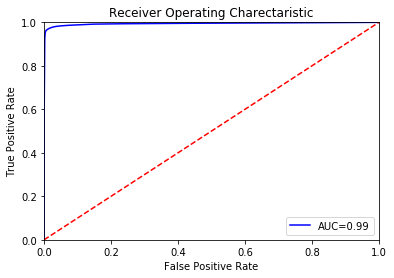

In [71]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import sklearn.metrics as metrics
prob=rf.predict_proba(x_test)
pred=prob[:,1]
fpr,tpr,threshold=roc_curve(y_test,pred)
roc_auc=metrics.auc(fpr,tpr)
plt.title("Receiver Operating Charectaristic")
plt.plot(fpr,tpr,'b',label='AUC=%0.2f'%roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.show()

# Saving the Model

In [72]:
import joblib
joblib.dump(Final_mod,'FinalModel.pk1')

['FinalModel.pk1']